/home/lab/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


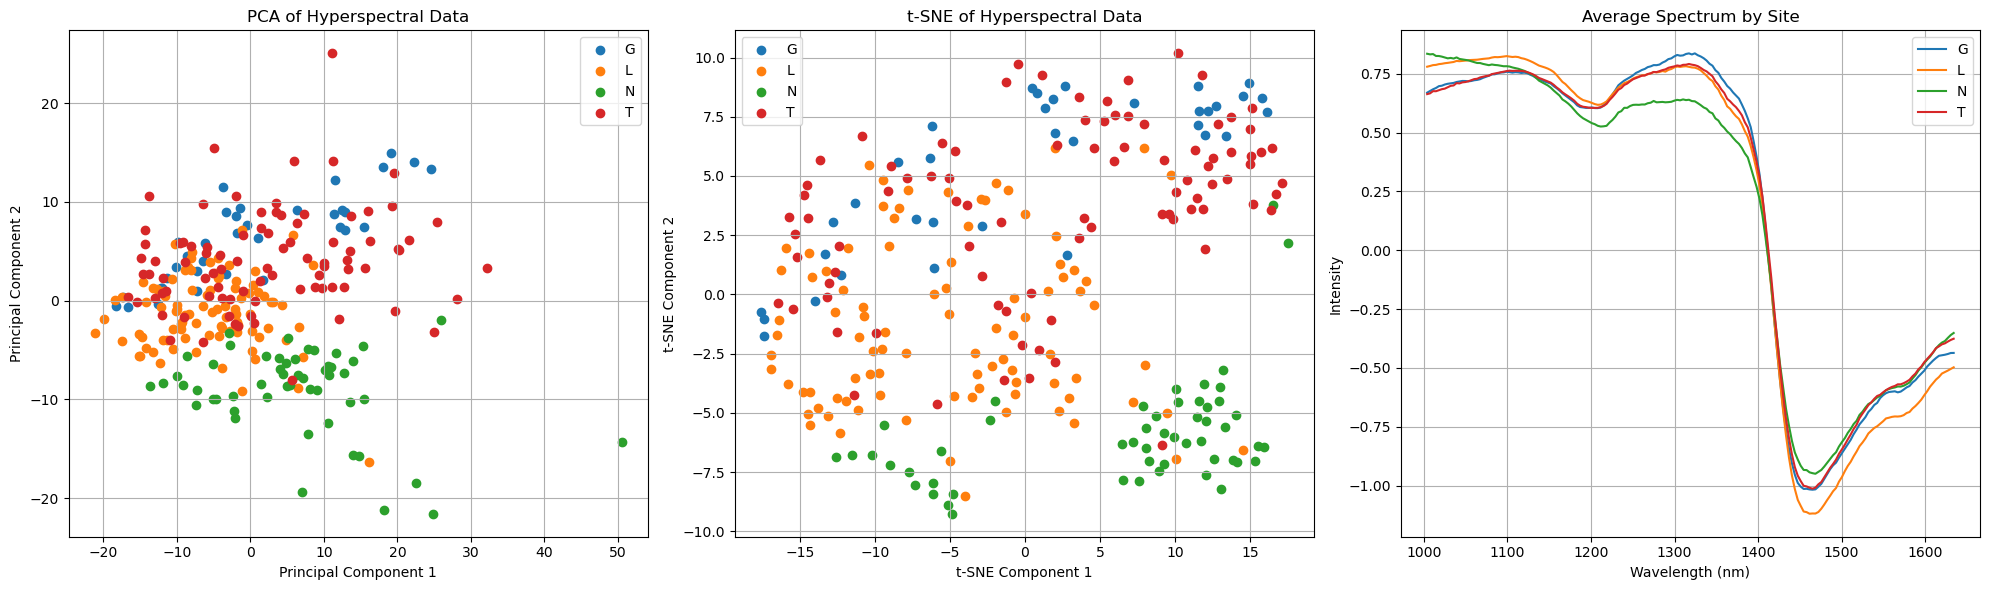

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your CSV file
file_path = 'N-G-T-L_Sites_combined_zscore_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and label
labels = data['Site']  # Use the 'Site' column with 4 classes
features = data.drop(['Site'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Define the wavelength range from 1004 to 1634
wavelengths = np.linspace(1004, 1634, num=features.shape[1])

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # Encode to numerical values

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_features = tsne.fit_transform(scaled_features)

# Create a single figure with three plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot PCA colored by labels
for label in np.unique(encoded_labels):
    axes[0].scatter(
        pca_features[encoded_labels == label, 0],
        pca_features[encoded_labels == label, 1],
        label=label_encoder.inverse_transform([label])[0]
    )
axes[0].set_title('PCA of Hyperspectral Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid()

# Plot t-SNE colored by labels
for label in np.unique(encoded_labels):
    axes[1].scatter(
        tsne_features[encoded_labels == label, 0],
        tsne_features[encoded_labels == label, 1],
        label=label_encoder.inverse_transform([label])[0]
    )
axes[1].set_title('t-SNE of Hyperspectral Data')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].legend()
axes[1].grid()

# Calculate and plot average spectrum for each site
average_spectra = data.groupby('Site').mean()

# Drop irrelevant columns
average_spectra = average_spectra.iloc[:, 20:-24]

# Plot the spectrum with updated wavelength range
for site in average_spectra.index:
    axes[2].plot(
        wavelengths,  # Use adjusted wavelengths
        average_spectra.loc[site],
        label=site
    )
axes[2].set_title('Average Spectrum by Site')
axes[2].set_xlabel('Wavelength (nm)')
axes[2].set_ylabel('Intensity')
axes[2].legend()
axes[2].grid()

# Adjust layout and save to a single image file
plt.tight_layout()
plt.savefig('output_image_with_tsne_and_correct_wavelengths.png')
plt.show()


/home/lab/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


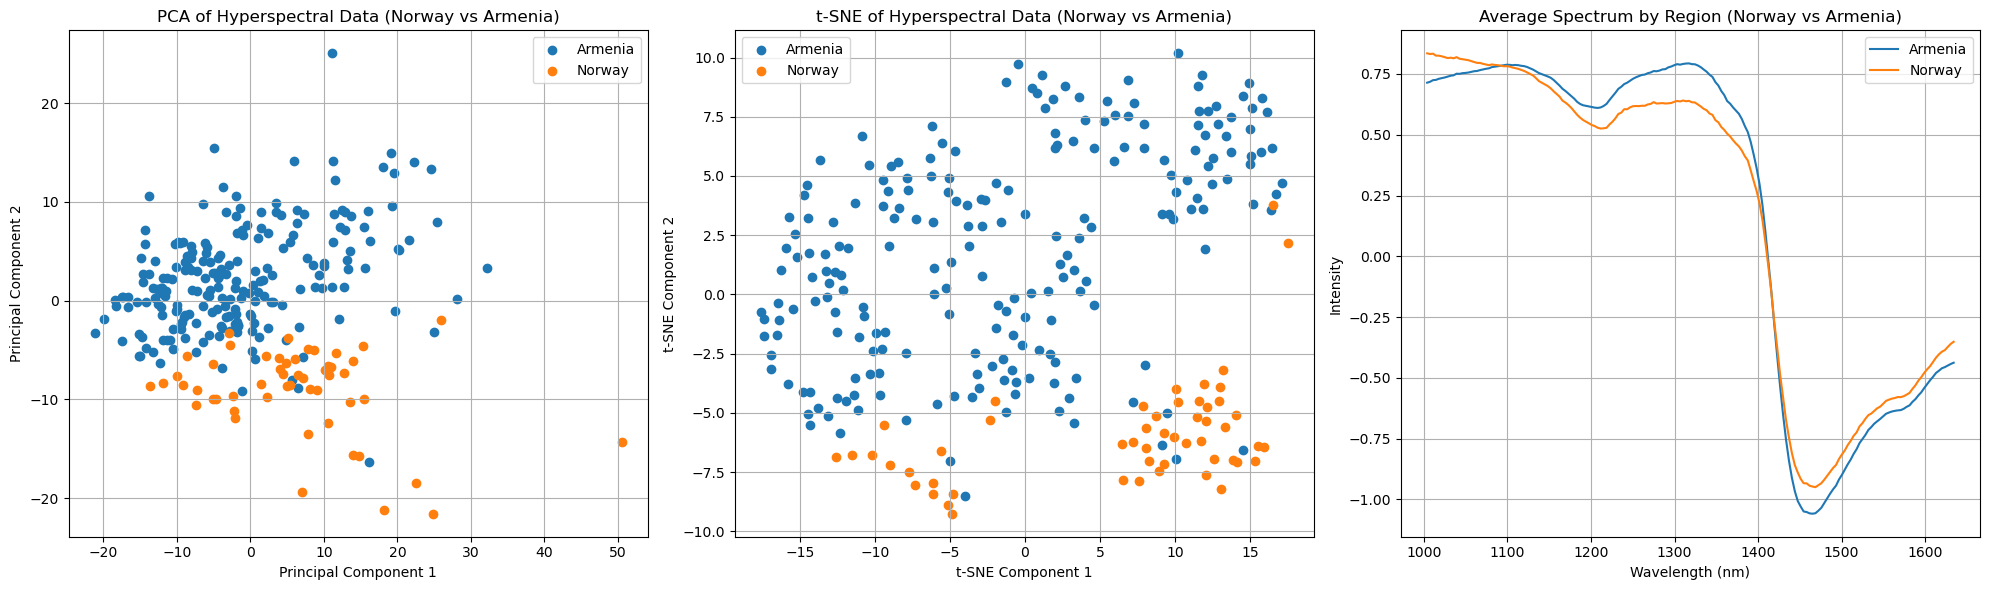

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your CSV file
file_path = 'N-G-T-L_Sites_combined_zscore_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine sites into two categories: Norway and Armenia
data['Site'] = data['Site'].apply(lambda x: 'Norway' if x == 'N' else 'Armenia')

# Separate features and label
labels = data['Site']  # Use the combined 'Site' column
features = data.drop(['Site'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Define the wavelength range from 1004 to 1634
wavelengths = np.linspace(1004, 1634, num=features.shape[1])

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # Encode to numerical values

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_features = tsne.fit_transform(scaled_features)

# Create a single figure with three plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot PCA colored by labels
for label in np.unique(encoded_labels):
    axes[0].scatter(
        pca_features[encoded_labels == label, 0],
        pca_features[encoded_labels == label, 1],
        label=label_encoder.inverse_transform([label])[0]
    )
axes[0].set_title('PCA of Hyperspectral Data (Norway vs Armenia)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid()

# Plot t-SNE colored by labels
for label in np.unique(encoded_labels):
    axes[1].scatter(
        tsne_features[encoded_labels == label, 0],
        tsne_features[encoded_labels == label, 1],
        label=label_encoder.inverse_transform([label])[0]
    )
axes[1].set_title('t-SNE of Hyperspectral Data (Norway vs Armenia)')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].legend()
axes[1].grid()

# Calculate and plot average spectrum for Norway and Armenia
average_spectra = data.groupby('Site').mean()

# Drop irrelevant columns
average_spectra = average_spectra.iloc[:, 20:-24]

# Plot the spectrum with updated wavelength range
for site in average_spectra.index:
    axes[2].plot(
        wavelengths,  # Use adjusted wavelengths
        average_spectra.loc[site],
        label=site
    )
axes[2].set_title('Average Spectrum by Region (Norway vs Armenia)')
axes[2].set_xlabel('Wavelength (nm)')
axes[2].set_ylabel('Intensity')
axes[2].legend()
axes[2].grid()

# Adjust layout and save to a single image file
plt.tight_layout()
plt.savefig('output_image_norway_vs_armenia_with_correct_wavelengths.png')
plt.show()


/home/lab/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/lab/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/lab/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/lab/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

       Model  Accuracy  Balanced Accuracy       AUC
0        MLP  0.974074           0.962468  0.995570
1         RF  0.940171           0.912338  0.976732
2        SVM  0.947436           0.911039  0.980231
3        GBM  0.932906           0.894113  0.978341
4   AdaBoost  0.936467           0.910173  0.968066
5         LR  0.966524           0.942468  0.989120
6        PLS  0.914387           0.824481       NaN
7  Consensus  0.944017           0.908766  0.990981


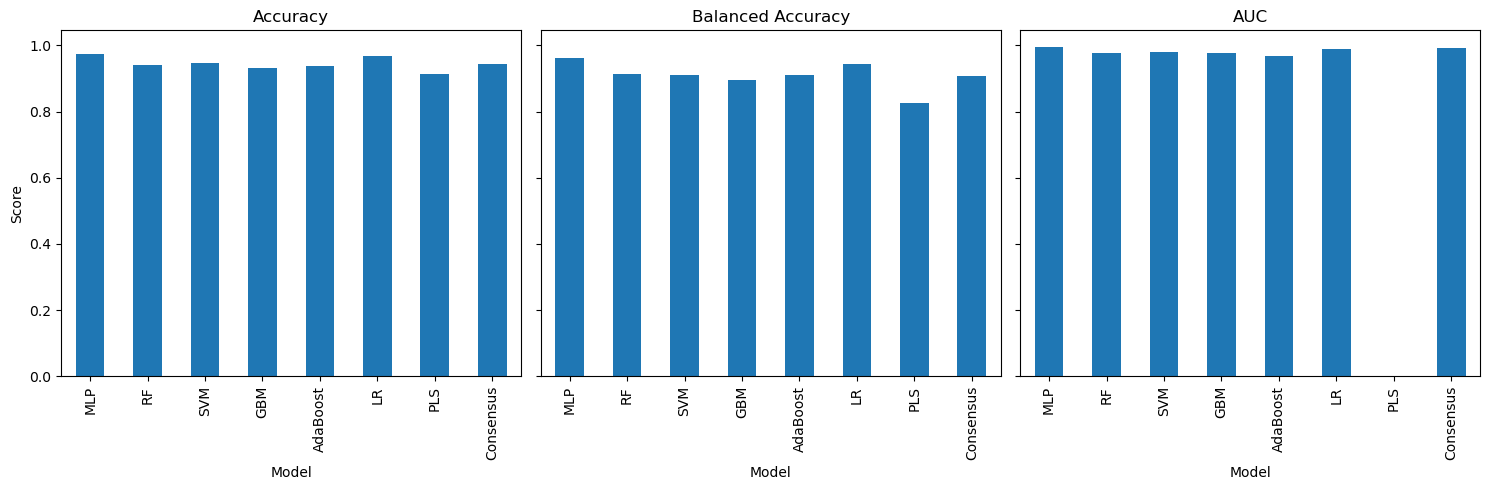

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your CSV file
file_path = 'N-G-T-L_Sites_combined_zscore_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine sites into two categories: Norway and Armenia
data['Site'] = data['Site'].apply(lambda x: 'Norway' if x == 'N' else 'Armenia')

# Separate features and label
labels = data['Site']  # Use 'Site' column with Norway and Armenia classes
features = data.drop(['Site'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Encode to numerical values

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Set up 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Models to evaluate
models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "GBM": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "LR": LogisticRegression(max_iter=1000, random_state=42),
    "PLS": PLSRegression(n_components=2)
}

# Initialize metrics dictionary
metrics = {
    "Model": [],
    "Accuracy": [],
    "Balanced Accuracy": [],
    "AUC": []
}

# Perform cross-validation for each model
for model_name, model in models.items():
    accuracies = []
    balanced_accuracies = []
    auc_scores = []

    for train_index, test_index in kf.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Train model
        if model_name == "PLS":
            model.fit(X_train, y_train)
            y_pred = np.round(model.predict(X_test)).astype(int)
            y_prob = None
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] if len(label_encoder.classes_) == 2 else None

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

        accuracies.append(acc)
        balanced_accuracies.append(balanced_acc)
        auc_scores.append(auc)

    # Store metrics
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(np.mean(accuracies))
    metrics["Balanced Accuracy"].append(np.mean(balanced_accuracies))
    metrics["AUC"].append(np.mean(auc_scores) if not np.isnan(auc_scores).all() else np.nan)

# Consensus (average of model predictions)
accuracies = []
balanced_accuracies = []
auc_scores = []

for train_index, test_index in kf.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    consensus_preds = np.zeros((len(y_test), len(models)))
    consensus_probs = np.zeros((len(y_test), len(models)))

    for i, (model_name, model) in enumerate(models.items()):
        if model_name == "PLS":
            model.fit(X_train, y_train)
            consensus_preds[:, i] = np.round(model.predict(X_test)).astype(int)
        else:
            model.fit(X_train, y_train)
            consensus_preds[:, i] = model.predict(X_test)
            if len(label_encoder.classes_) == 2:
                consensus_probs[:, i] = model.predict_proba(X_test)[:, 1]

    y_pred = np.round(consensus_preds.mean(axis=1)).astype(int)
    y_prob = consensus_probs.mean(axis=1) if len(label_encoder.classes_) == 2 else None

    acc = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    accuracies.append(acc)
    balanced_accuracies.append(balanced_acc)
    auc_scores.append(auc)

metrics["Model"].append("Consensus")
metrics["Accuracy"].append(np.mean(accuracies))
metrics["Balanced Accuracy"].append(np.mean(balanced_accuracies))
metrics["AUC"].append(np.mean(auc_scores) if not np.isnan(auc_scores).all() else np.nan)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print metrics table
print(metrics_df)

# Plot bar graphs for metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

metrics_df.set_index("Model")[["Accuracy"]].plot(kind="bar", ax=axes[0], title="Accuracy", legend=False)
metrics_df.set_index("Model")[["Balanced Accuracy"]].plot(kind="bar", ax=axes[1], title="Balanced Accuracy", legend=False)
metrics_df.set_index("Model")[["AUC"]].plot(kind="bar", ax=axes[2], title="AUC", legend=False)

for ax in axes:
    ax.set_ylabel("Score")
    ax.set_xlabel("Model")

plt.tight_layout()
plt.show()


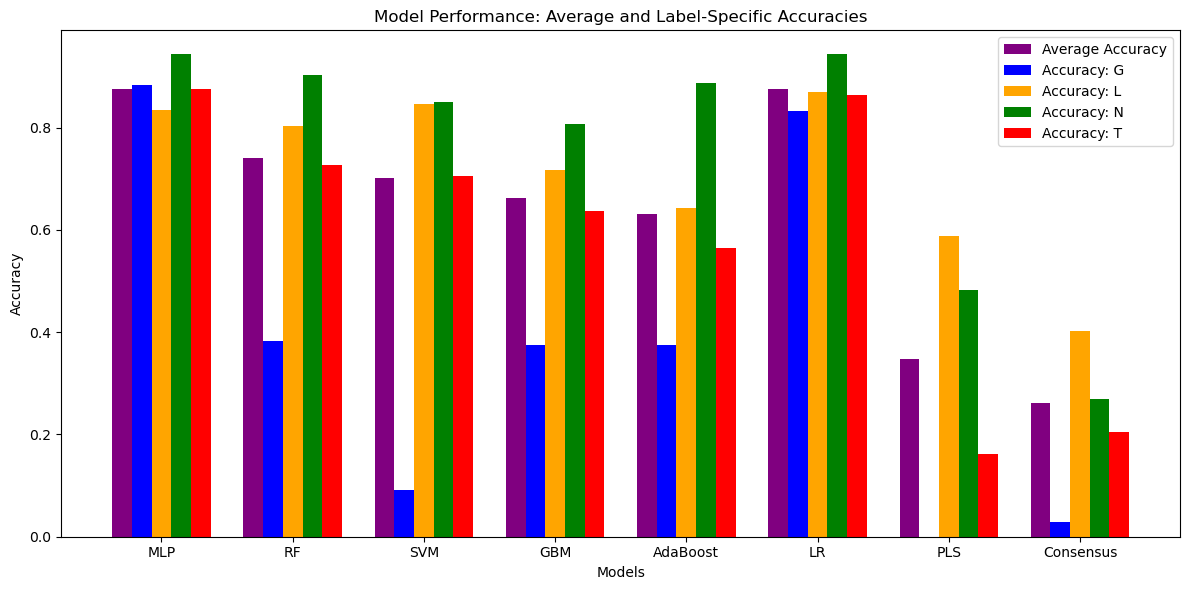


### Metrics Summary ###

Average Accuracies:
       Model  Average Accuracy
0        MLP          0.875926
1         RF          0.741026
2        SVM          0.700855
3        GBM          0.662821
4   AdaBoost          0.632051
5         LR          0.876211
6        PLS          0.348291
7  Consensus          0.262172

Accuracy per Label:
          G         L         N         T      Model
0  0.883333  0.835556  0.943333  0.875000        MLP
1  0.383333  0.803333  0.903333  0.727778         RF
2  0.091667  0.846667  0.850000  0.705556        SVM
3  0.375000  0.716667  0.806667  0.637500        GBM
4  0.375000  0.643333  0.886667  0.565278   AdaBoost
5  0.833333  0.870000  0.943333  0.863889         LR
6  0.000000  0.588889  0.483333  0.161111        PLS
7  0.028571  0.402174  0.269231  0.204545  Consensus


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your CSV file
file_path = 'N-G-T-L_Sites_combined_zscore_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and label
labels = data['Site']  # Use the 'Site' column with 4 classes
features = data.drop(['Site'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # Encode to numerical values

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Set up 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Models to evaluate
models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "GBM": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "LR": LogisticRegression(max_iter=1000, random_state=42),
    "PLS": PLSRegression(n_components=2)
}

# Initialize metrics dictionary
metrics = {
    "Model": [],
    "Average Accuracy": [],
    "Accuracy per Label": {label: [] for label in label_encoder.classes_}
}

# Perform cross-validation for each model
all_predictions = []
for model_name, model in models.items():
    fold_accuracies = []
    label_accuracies = {label: [] for label in label_encoder.classes_}
    model_predictions = []

    for train_index, test_index in kf.split(features, encoded_labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]

        # Train model
        if model_name == "PLS":
            model.fit(X_train, y_train)
            y_pred = np.round(model.predict(X_test)).astype(int)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Store predictions for consensus
        model_predictions.append(y_pred)

        # Overall accuracy
        fold_accuracies.append(accuracy_score(y_test, y_pred))

        # Accuracy per label
        for label in np.unique(encoded_labels):
            label_mask = y_test == label
            label_accuracies[label_encoder.inverse_transform([label])[0]].append(
                accuracy_score(y_test[label_mask], y_pred[label_mask])
            )

    all_predictions.append(np.concatenate(model_predictions))

    # Store metrics
    metrics["Model"].append(model_name)
    metrics["Average Accuracy"].append(np.mean(fold_accuracies))
    for label in label_encoder.classes_:
        metrics["Accuracy per Label"][label].append(np.mean(label_accuracies[label]))

# Calculate consensus predictions
consensus_predictions = np.mean(np.array(all_predictions), axis=0).round().astype(int)
consensus_accuracy = accuracy_score(encoded_labels, consensus_predictions)
consensus_label_accuracies = {
    label_encoder.inverse_transform([label])[0]:
    accuracy_score(encoded_labels[encoded_labels == label], consensus_predictions[encoded_labels == label])
    for label in np.unique(encoded_labels)
}

# Add consensus to metrics
metrics["Model"].append("Consensus")
metrics["Average Accuracy"].append(consensus_accuracy)
for label in label_encoder.classes_:
    metrics["Accuracy per Label"][label].append(consensus_label_accuracies[label])

# Convert metrics to DataFrame for visualization
average_accuracies = pd.DataFrame({
    "Model": metrics["Model"],
    "Average Accuracy": metrics["Average Accuracy"]
})

label_accuracies = pd.DataFrame(metrics["Accuracy per Label"])
label_accuracies["Model"] = metrics["Model"]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics["Model"]))
width = 0.15  # Width of bars

# Plot average accuracy
ax.bar(x - 2 * width, average_accuracies["Average Accuracy"], width, label="Average Accuracy", color="purple")

# Plot accuracies for each label with specified colors
class_colors = ['blue', 'orange', 'green', 'red']  # Colors for G, L, N, T respectively
for i, (label, color) in enumerate(zip(label_encoder.classes_, class_colors)):
    ax.bar(x + (i - 1) * width, label_accuracies[label], width, label=f"Accuracy: {label}", color=color)

# Add labels and legend
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Model Performance: Average and Label-Specific Accuracies")
ax.set_xticks(x)
ax.set_xticklabels(metrics["Model"])
ax.legend()

plt.tight_layout()
plt.savefig("model_performance_with_custom_colors.png")
plt.show()

# Print metrics below the graph
print("\n### Metrics Summary ###\n")
print("Average Accuracies:")
print(average_accuracies)
print("\nAccuracy per Label:")
print(label_accuracies)


Top 5 most important wavelengths for class 'G' are:
1091.99 nm, 1433.39 nm, 1246.85 nm, 1373.55 nm, 1426.35 nm
Top 5 most important wavelengths for class 'L' are:
1187.02 nm, 1408.75 nm, 1183.50 nm, 1215.17 nm, 1204.61 nm
Top 5 most important wavelengths for class 'N' are:
1084.95 nm, 1524.89 nm, 1018.08 nm, 1074.39 nm, 1419.31 nm
Top 5 most important wavelengths for class 'T' are:
1014.56 nm, 1584.73 nm, 1077.91 nm, 1053.27 nm, 1081.43 nm


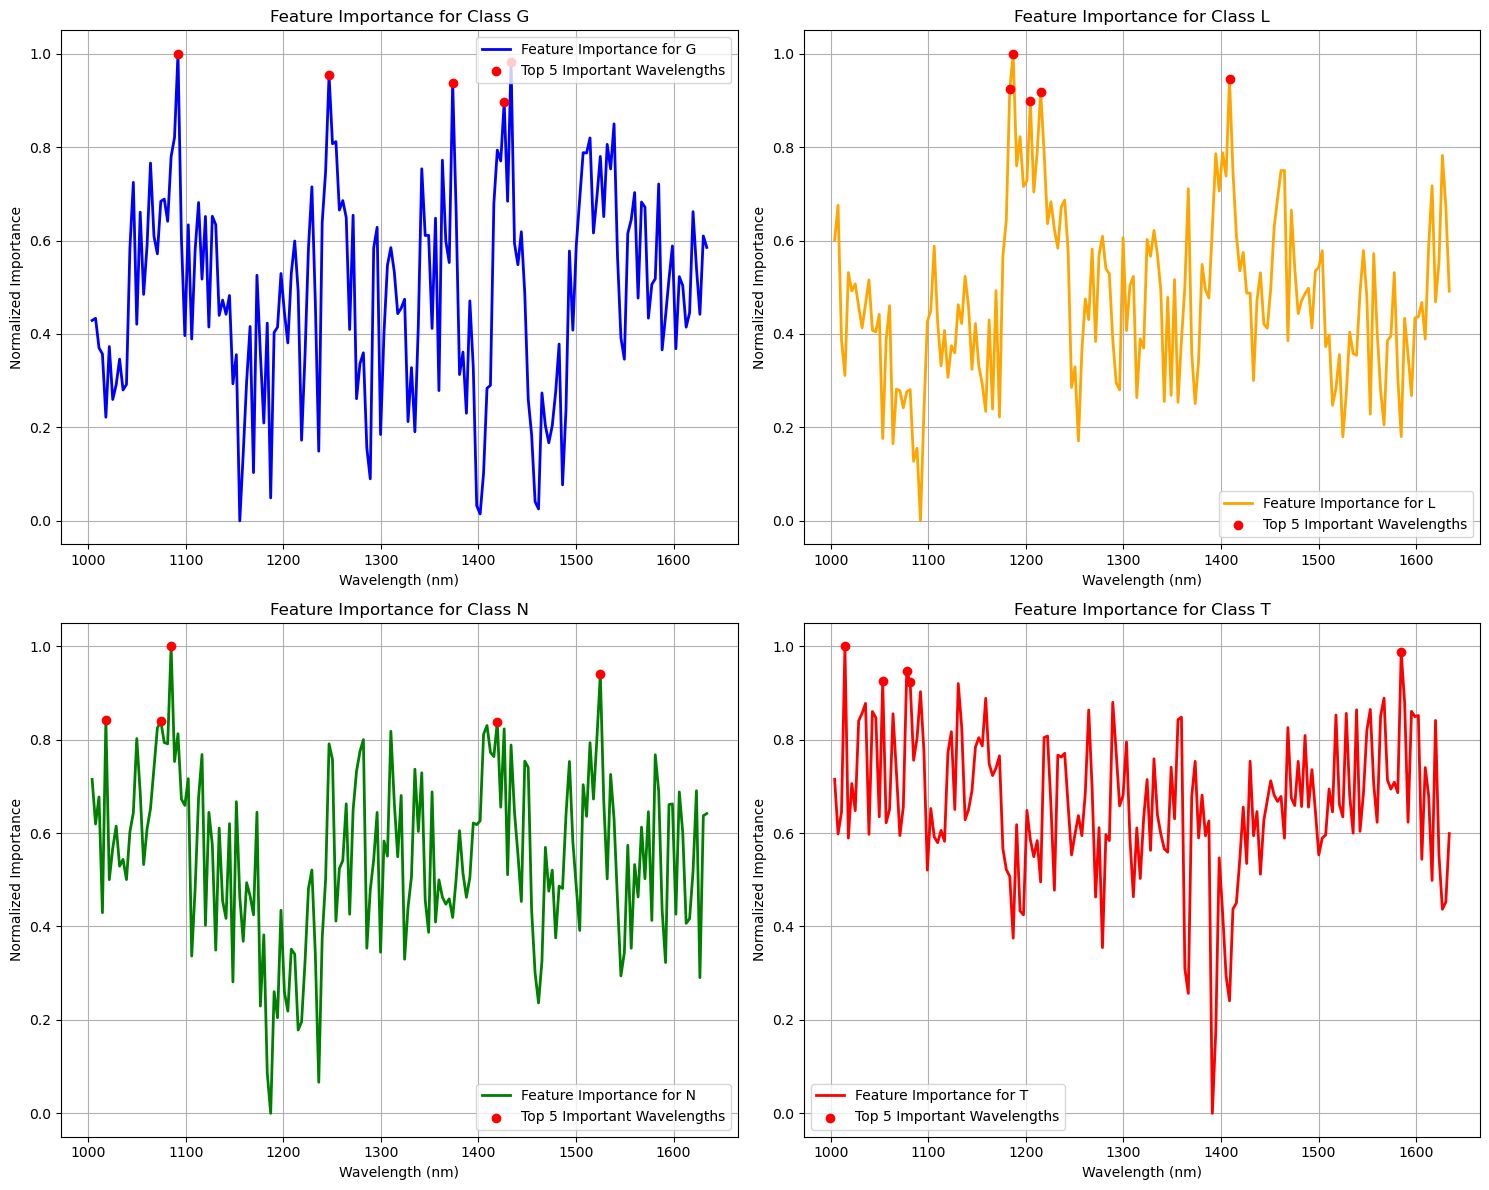

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from captum.attr import IntegratedGradients

# Load the dataset
file_path = 'N-G-T-L_Sites_combined_zscore_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and label
labels = data['Site']
features = data.drop(['Site'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Define wavelength range
original_wavelengths = np.linspace(1004, 1634, num=features.shape[1])

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
class_names = label_encoder.classes_

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(features_scaled, dtype=torch.float32)
y_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Train an MLP classifier on the entire dataset
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(features_scaled, encoded_labels)

# Convert the trained weights to PyTorch
class TorchMLP(torch.nn.Module):
    def __init__(self, sk_mlp):
        super(TorchMLP, self).__init__()
        self.hidden = torch.nn.Sequential(
            torch.nn.Linear(features_scaled.shape[1], 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, len(np.unique(encoded_labels)))
        )
        # Set weights and biases
        self.hidden[0].weight.data = torch.tensor(sk_mlp.coefs_[0].T, dtype=torch.float32)
        self.hidden[0].bias.data = torch.tensor(sk_mlp.intercepts_[0], dtype=torch.float32)
        self.hidden[2].weight.data = torch.tensor(sk_mlp.coefs_[1].T, dtype=torch.float32)
        self.hidden[2].bias.data = torch.tensor(sk_mlp.intercepts_[1], dtype=torch.float32)

    def forward(self, x):
        return self.hidden(x)

# Convert scikit-learn MLP to PyTorch
torch_mlp = TorchMLP(mlp)
torch_mlp.eval()

# Integrated Gradients
ig = IntegratedGradients(torch_mlp)

# Define colors for each class
colors = ['blue', 'orange', 'green', 'red']

# Prepare a single figure for 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Calculate and store importance for each class
for idx, (class_name, ax) in enumerate(zip(class_names, axes)):
    attributions, delta = ig.attribute(X_tensor, target=idx, return_convergence_delta=True)
    attributions_np = attributions.detach().numpy().mean(axis=0)
    normalized_attributions = (attributions_np - np.min(attributions_np)) / (
        np.max(attributions_np) - np.min(attributions_np)
    )

    # Identify the top 5 wavelengths with the highest importance
    top_5_indices = np.argsort(-normalized_attributions)[:5]
    top_5_wavelengths = original_wavelengths[top_5_indices]
    top_5_importances = normalized_attributions[top_5_indices]

    # Print the top 5 wavelengths for the class
    print(f"Top 5 most important wavelengths for class '{class_name}' are:")
    print(", ".join([f"{wavelength:.2f} nm" for wavelength in top_5_wavelengths]))

    # Plot the importance for the current class
    ax.plot(
        original_wavelengths,
        normalized_attributions,
        color=colors[idx],
        label=f"Feature Importance for {class_name}",
        linewidth=2
    )
    ax.scatter(top_5_wavelengths, top_5_importances, color="red", label="Top 5 Important Wavelengths", zorder=5)
    ax.set_title(f"Feature Importance for Class {class_name}")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Normalized Importance")
    ax.grid(True)
    ax.legend()

# Adjust layout for the combined plot
plt.tight_layout()
plt.savefig("combined_feature_importance_2x2.png")
plt.show()


Top 5 most important wavelengths are:
1018.08 nm, 1011.04 nm, 1584.73 nm, 1095.51 nm, 1088.47 nm


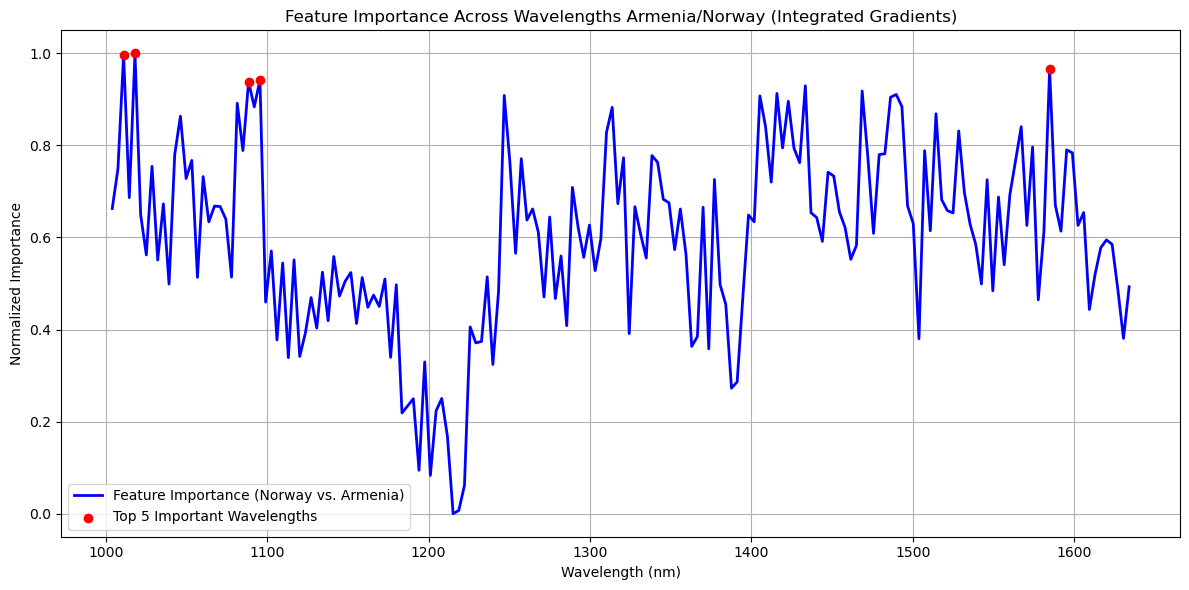

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from captum.attr import IntegratedGradients

# Load your CSV file
file_path = 'N-G-T-L_Sites_combined_zscore_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine sites into two categories: Norway and Armenia
data['Site'] = data['Site'].apply(lambda x: 'Norway' if x == 'N' else 'Armenia')

# Separate features and label
labels = data['Site']  # Use 'Site' column with Norway and Armenia classes
features = data.drop(['Site'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Define wavelength range
original_wavelengths = np.linspace(1004, 1634, num=features.shape[1])

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
class_names = label_encoder.classes_

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(features_scaled, dtype=torch.float32)
y_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Train an MLP classifier on the entire dataset
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(features_scaled, encoded_labels)

# Convert the trained weights to PyTorch
class TorchMLP(torch.nn.Module):
    def __init__(self, sk_mlp):
        super(TorchMLP, self).__init__()
        self.hidden = torch.nn.Sequential(
            torch.nn.Linear(features_scaled.shape[1], 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, len(np.unique(encoded_labels)))
        )
        # Set weights and biases
        self.hidden[0].weight.data = torch.tensor(sk_mlp.coefs_[0].T, dtype=torch.float32)
        self.hidden[0].bias.data = torch.tensor(sk_mlp.intercepts_[0], dtype=torch.float32)
        self.hidden[2].weight.data = torch.tensor(sk_mlp.coefs_[1].T, dtype=torch.float32)
        self.hidden[2].bias.data = torch.tensor(sk_mlp.intercepts_[1], dtype=torch.float32)

    def forward(self, x):
        return self.hidden(x)

# Convert scikit-learn MLP to PyTorch
torch_mlp = TorchMLP(mlp)
torch_mlp.eval()

# Integrated Gradients
ig = IntegratedGradients(torch_mlp)

# Calculate feature importance for the entire dataset (binary classification)
attributions, delta = ig.attribute(X_tensor, target=0, return_convergence_delta=True)
attributions_np = attributions.detach().numpy().mean(axis=0)
normalized_attributions = (attributions_np - np.min(attributions_np)) / (
    np.max(attributions_np) - np.min(attributions_np)
)

# Identify the top 5 wavelengths with the highest importance
top_5_indices = np.argsort(-normalized_attributions)[:5]
top_5_wavelengths = original_wavelengths[top_5_indices]
top_5_importances = normalized_attributions[top_5_indices]

# Print the top 5 wavelengths
print("Top 5 most important wavelengths are:")
print(", ".join([f"{wavelength:.2f} nm" for wavelength in top_5_wavelengths]))

# Plot the feature importance for binary classification
plt.figure(figsize=(12, 6))
plt.plot(
    original_wavelengths,
    normalized_attributions,
    color="blue",
    label="Feature Importance (Norway vs. Armenia)",
    linewidth=2
)
plt.scatter(top_5_wavelengths, top_5_importances, color="red", label="Top 5 Important Wavelengths", zorder=5)
plt.title("Feature Importance Across Wavelengths Armenia/Norway (Integrated Gradients)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Importance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("feature_importance_Norway_Armenia_binary.png")
plt.show()
